# Correlation

Use the Pandas library to analyze five semiconductor stocks—`INTC`, `AMD`, `MU`, `NVDA`, and `TSM`—and choose the stock with the least correlation to `JNJ` and `HD`.

The reason to choose stocks that are less correlated to other stocks is to diversify a portfolio.

Go [here](https://www.investopedia.com/terms/d/diversification.asp) to learn more about diversification and how correlation among stocks in portfolios are a factor in minimizing risk.

## 1. Import libraries and dependencies.
  - Import the `pandas`,`seaborn` and `pathlib` libraries, and set the `%matplotlib inline` property.


In [2]:
# Import libraries and dependencies
import pandas as pd
import seaborn as sbs
from pathlib import Path
%matplotlib inline
# YOUR CODE HERE!

## 2. Create `Path` Objects
   - Create a path objects for each `csv` file using the `Pathlib` library.

In [3]:
# Set file paths
# YOUR CODE HERE!
tsm_file = Path("/Users/pete/Documents/Fintech-Workspace/M4/Class_2_Activities/06-Stu_Correlation/Resources/TSM.csv")
nvda_file = Path("/Users/pete/Documents/Fintech-Workspace/M4/Class_2_Activities/06-Stu_Correlation/Resources/NVDA.csv")
mu_file= Path("/Users/pete/Documents/Fintech-Workspace/M4/Class_2_Activities/06-Stu_Correlation/Resources/MU.csv") 
jnj_file = Path("/Users/pete/Documents/Fintech-Workspace/M4/Class_2_Activities/06-Stu_Correlation/Resources/JNJ.csv")
intc_file = Path("/Users/pete/Documents/Fintech-Workspace/M4/Class_2_Activities/06-Stu_Correlation/Resources/INTC.csv")
hd_file = Path("/Users/pete/Documents/Fintech-Workspace/M4/Class_2_Activities/06-Stu_Correlation/Resources/HD.csv")
amd_file = Path("/Users/pete/Documents/Fintech-Workspace/M4/Class_2_Activities/06-Stu_Correlation/Resources/AMD.csv")


## 3. Read the `CSV` files into a `Pandas` DataFrames.
  - Read the `CSV` files into a `DataFrame` and set the `date` column as the index.

In [9]:
# Read the individual CSV datasets
# YOUR CODE HERE!
tsm_df = pd.read_csv(tsm_file,index_col="date", parse_dates = True, infer_datetime_format = True)
nvda_df = pd.read_csv(nvda_file,index_col="date", parse_dates = True, infer_datetime_format = True)                
mu_df = pd.read_csv(mu_file,index_col="date", parse_dates = True, infer_datetime_format = True)
jnj_df = pd.read_csv(jnj_file,index_col="date", parse_dates = True, infer_datetime_format = True)
intc_df = pd.read_csv(intc_file,index_col="date", parse_dates = True, infer_datetime_format = True)
hd_df = pd.read_csv(hd_file,index_col="date", parse_dates = True, infer_datetime_format = True)
amd_df = pd.read_csv(amd_file,index_col="date", parse_dates = True, infer_datetime_format = True)

## 4. Combine the DataFrames
  - Use the `concat` function to combine the seven DataFrames into a single combined DataFrame

In [18]:
# Use the `concat` function to combine the DataFrames by `date`
# YOUR CODE HERE!
combined = pd.concat([tsm_df, nvda_df,mu_df,jnj_df,intc_df,hd_df,amd_df], axis = 1).dropna()
combined.head()

,TSM,NVDA,MU,JNJ,INTC,HD,AMD
date,,,,,,,
2019-05-14,41.97,162.04,38.51,66.97,45.17,191.62,27.32
2019-05-13,40.99,158.45,37.38,66.49,44.76,190.34,26.24
2019-05-10,42.83,168.82,38.94,67.22,46.20,194.58,27.96
2019-05-09,43.25,170.19,39.27,66.04,46.62,194.58,27.21
2019-05-08,43.70,173.92,39.75,66.02,49.24,195.17,27.09


## 5. Calculate Daily Returns
  - Use the `pct_change` method to calculate the daily returns and drop `n/a` values

In [20]:
# Use the `pct_change` function to calculate daily returns for each stock
# YOUR CODE HERE!
combined_returns = combined.pct_change()
combined_returns.head()

,TSM,NVDA,MU,JNJ,INTC,HD,AMD
date,,,,,,,
2019-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-13,-0.023350,-0.022155,-0.029343,-0.007167,-0.009077,-0.006680,-0.039531
2019-05-10,0.044889,0.065447,0.041734,0.010979,0.032172,0.022276,0.065549
2019-05-09,0.009806,0.008115,0.008475,-0.017554,0.009091,0.000000,-0.026824
2019-05-08,0.010405,0.021917,0.012223,-0.000303,0.056199,0.003032,-0.004410


## 6. Calculate Correlation
  -  Use the `corr` function on the combined DataFrame to calculate and output a correlation table of each stock-to-stock pair.

In [26]:
# Use the `corr` function to calculate correlations for each stock pair
# YOUR CODE HERE!
combined_corr = combined_returns.corr()
combined_corr.head(10)

,TSM,NVDA,MU,JNJ,INTC,HD,AMD
TSM,1.000000,0.472496,0.477247,0.317493,0.500741,0.393293,0.352482
NVDA,0.472496,1.000000,0.517198,0.257717,0.483262,0.360918,0.471212
MU,0.477247,0.517198,1.000000,0.337060,0.511066,0.375932,0.438329
JNJ,0.317493,0.257717,0.337060,1.000000,0.318188,0.329386,0.254498
INTC,0.500741,0.483262,0.511066,0.318188,1.000000,0.429047,0.385877
HD,0.393293,0.360918,0.375932,0.329386,0.429047,1.000000,0.294653
AMD,0.352482,0.471212,0.438329,0.254498,0.385877,0.294653,1.000000


## 7. Plot Correlation
  - Use the `heatmap` function from the Seaborn library to create a heatmap of correlation values.
  - You can read more about the heatmap method from seaborn on the [documentation page](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap).

<AxesSubplot:>

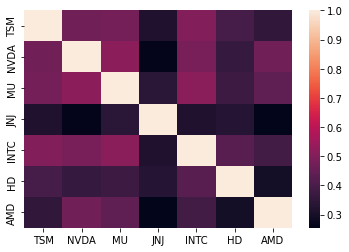

In [24]:
# Create a heatmap from the correlation values
sbs.heatmap(combined_corr)

### Which semiconductor stock would be the best candidate to add to the existing portfolio?